# **"Machine Learning with ChatGPT: Image Classification Model": Machine Learning (ML) Workflows in Image Classification Mini-Projects**
### Brandon Fox

## Machine Learning (ML) Workflow #1: The First Training/Testing of the First Keras Neural Network Model on the MNIST Dataset

In [ ]:
# 1. Collect and load in the raw data (it's the MNIST dataset)

# Importing the needed Machine Learning (ML) frameworks, libraries, APIs, packages, and modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Loading in the raw data as training/testing data, respectively
# Training Tuple: (Image Training Samples, Training Labels), Testing Tuple: (Image Testing Samples, Testing Labels)
(x_sample_images_training, y_labels_training), (x_sample_images_testing, y_labels_testing) = keras.datasets.mnist.load_data()
# Recall: Tuples are "ordered", "immutable" Python data structures.
# Since we're loading the entire MNIST dataset into what has to be 2 tuple data structures, we'll always have the data loaded into "training" and "testing" tuples,
# rather than just leaving one of the tuples empty!

# 2. Preprocess the data

# Reshaping the sample images to flat vectors
x_sample_images_training = x_sample_images_training.reshape((x_sample_images_training.shape[0], 28 * 28))
x_sample_images_testing = x_sample_images_testing.reshape((x_sample_images_testing.shape[0], 28 * 28))
# "x_sample_images_testing.shape[0]" refers to the total number of sample images in the MNIST dataset and "28 * 28" (or 28 ** 2) refers to the input shape, or
# simply put, the dimensions of the input data.

# Or: Normalizing the pixel values to the range interval: [0, 1]
# x_sample_images_training = x_sample_images_training.astype('float32') / 255.0
# x_sample_images_testing = x_sample_images_testing.astype('float32') / 255.0
# 255 = Maximum RGB value

# Converting the labels to one-hot encoded vectors
y_labels_training = tf.keras.utils.to_categorical(y_labels_training, 10)
y_labels_testing = tf.keras.utils.to_categorical(y_labels_testing, 10)
# "10" refers to the total number of labels there are, in which those labels are the numbers: 0 to 9.

# 3. Build and compile the neural network model

# Building the neural network model
# Creating a new Keras "model" instance of the "Sequential" class
model = Sequential()

# Adding in the fully connected "Dense" layers into the neural network model
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))
# We need a "Softmax" activation function in the final layer because we're dealing with a "multi-class" classfication problem; the "Softmax" activation function
# outputs an array of class probabilities.

# Compiling the neural network model
# Optimizer: Adam, Loss Function: Categorical crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Train (or fit) the model

# Training (or fitting) the model
# Epochs: 10, Batch size: 128 (we'll keep them like this all throughout each Machine Learning (ML) workflow!)
model.fit(x_sample_images_training, y_labels_training, epochs=10, batch_size=128, verbose=1)

# 5. Test (or evaluate) the model

# Testing (or evaluating) the model
loss, accuracy = model.evaluate(x_sample_images_testing, y_labels_testing)

# Printing the loss and accuracy results of the test
print("Test Evaluation: ")
print("Loss: ", loss)
print("Accuracy: ", accuracy)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 4.0904 - accuracy: 0.9091
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5439 - accuracy: 0.9564
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2687 - accuracy: 0.9677
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1779 - accuracy: 0.9751
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1678 - accuracy: 0.9769
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1960 - accuracy: 0.9739
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1601 - accuracy: 0.9771
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1393 - accuracy: 0.9804
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1785 - accuracy: 0.9770
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4826 - accuracy: 0.9612

## Machine Learning (ML) Workflow #2: Training/Testing a Keras Neural Network Model with a "Sparse Categorical Crossentropy" Loss Function

In [ ]:
# 1. Collect and load in the raw data (it's the MNIST dataset)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

(x_sample_images_training, y_labels_training), (x_sample_images_testing, y_labels_testing) = keras.datasets.mnist.load_data()

# 2. Preprocess the data
# Normalizing pixel values to the range interval: [0, 1]
x_sample_images_training = x_sample_images_training.astype('float32') / 255.0
x_sample_images_testing = x_sample_images_testing.astype('float32') / 255.0
# 255 = Maximum RGB value

# 3. Build and compile the neural network model
# Creating a new Keras "model" instance of the "Sequential" class, with a list of layers attribute
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                          # Layer that "flattens" the input features into a 1D vector
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])

# Loss Function: Sparse categorical crossentropy
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# 4. Train (or fit) the model
model.fit(x_sample_images_training, y_labels_training, epochs=10, batch_size=128, verbose=1)

# 5. Test (or evaluate) the model
loss, accuracy = model.evaluate(x_sample_images_testing, y_labels_testing)
print("Test Evaluation: ")
print("Loss: ", loss)
print("Accuracy: ", accuracy)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3552 - accuracy: 0.9037
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1607 - accuracy: 0.9538
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1140 - accuracy: 0.9674
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0888 - accuracy: 0.9744
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9794
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0586 - accuracy: 0.9833
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0484 - accuracy: 0.9862
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0411 - accuracy: 0.9882
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.9904
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0699 - accuracy: 0.9785

As we might realize, this particular neural network model tests (or evaluates) better than the previous neural network model!

## Machine Learning (ML) Workflow #3: Training/Testing a Keras Convolutional Neural Network (CNN)

In [ ]:
# 1. Collect and load in the raw data (it's the MNIST dataset)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

(x_sample_images_training, y_labels_training), (x_sample_images_testing, y_labels_testing) = keras.datasets.mnist.load_data()

# 2. Preprocess the data

x_sample_images_training = x_sample_images_training.reshape((x_sample_images_training.shape[0], 28, 28, 1))
x_sample_images_testing = x_sample_images_testing.reshape((x_sample_images_testing.shape[0], 28, 28, 1))

#x_sample_images_training = x_sample_images_training.astype('float32') / 255.0
#x_sample_images_testing = x_sample_images_testing.astype('float32') / 255.0

y_labels_training = to_categorical(y_labels_training, 10)
y_labels_testing = to_categorical(y_labels_testing, 10)

# 3. Build and compile the neural network model

# Building the neural network model
model = Sequential()

# Adding in the convolutional layers to neural network model (this is how the model becomes a CNN model!)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Adding in a layer that "flattens" the features into a 1D vector
model.add(Flatten())

# Adding in the fully connected "Dense" layers
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Train the model
model.fit(x_sample_images_training, y_labels_training, epochs=10, batch_size=128, verbose=1)

# 5. Test (or evaluate) the model
loss, accuracy = model.evaluate(x_sample_images_testing, y_labels_testing)
print("Test Evaluation: ")
print("Loss: ", loss)
print("Accuracy: ", accuracy)

Epoch 1/10
469/469 [==============================] - 34s 70ms/step - loss: 0.4929 - accuracy: 0.9155
Epoch 2/10
469/469 [==============================] - 39s 82ms/step - loss: 0.0655 - accuracy: 0.9799
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0444 - accuracy: 0.9860
Epoch 4/10
469/469 [==============================] - 38s 82ms/step - loss: 0.0344 - accuracy: 0.9895
Epoch 5/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0289 - accuracy: 0.9908
Epoch 6/10
469/469 [==============================] - 35s 74ms/step - loss: 0.0237 - accuracy: 0.9923
Epoch 7/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0228 - accuracy: 0.9925
Epoch 8/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0204 - accuracy: 0.9932
Epoch 9/10
469/469 [==============================] - 38s 82ms/step - loss: 0.0190 - accuracy: 0.9939
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0507 

Training a Convolutional Neural Network (CNN) takes some time, depending on the number of epochs and what the batch size is set to be, but the results after testing this neural network are better than the results of the previous two ordinary Keras neural networks, in the case of classifying images from the MNIST dataset!

## Machine Learning (ML) Workflow #4: Training a Keras CNN Model on 80% of the Original Training Dataset with the Other 20% Used as Validation Data



In [ ]:
# 1. Collect and load in the raw data (it's the MNIST dataset)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

(x_sample_images_training, y_labels_training), (x_sample_images_testing, y_labels_testing) = keras.datasets.mnist.load_data()

# 2. Preprocess the "training data"

x_sample_images_training = x_sample_images_training.reshape((x_sample_images_training.shape[0], 28, 28, 1))
y_labels_training = to_categorical(y_labels_training, 10)

# x_sample_images_training = x_sample_images_training.astype('float32') / 255.0
# x_sample_images_testing = x_sample_images_testing.astype('float32') / 255.0

# Split the "training data" into "training" and "validation" data subsets, respectively
# Percentage, as a float, of how much of the training data we want to use as validation data
validation_split = 0.2

# Formula: Training/Validation Cutoff Value (inclusive) = int(Total number of sample images for training * Remaining percentage, as a float, of the training data,
# given the known percentage, as a float, of the training data we would want to allocate towards the validation data subset)
split_index = int(x_sample_images_training.shape[0] * (1 - validation_split))

# Splitting the training data into 80% training data and 20% validation data subsets
x_sample_images_training = x_sample_images_training[:split_index]
y_labels_training = y_labels_training[:split_index]
x_validation = x_sample_images_training[split_index:]
y_validation = y_labels_training[split_index:]

# We'll just utilize a Machine Learning (ML) library for future splittings. It just makes the code a lot simplier!

# 3. Build and compile the neural network model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Train the model

model.fit(x_sample_images_training, y_labels_training, epochs=10, batch_size=128, verbose=1, validation_data=(x_validation, y_validation))

# 5. Preprocess the "testing data"

# Reshaping images to a flat vector
x_sample_images_testing = x_sample_images_testing.reshape((x_sample_images_testing.shape[0], 28, 28, 1))
# Converting labels to a one-hot encoded vector
y_labels_testing = to_categorical(y_labels_testing, 10)

# Even though preprocessing the "testing data" in "2." isn't wrong, it makes sense to preprocess the "testing data" after training the model because
# we really don't care about testing the model, until after it's been trained (as the old saying goes: "ONE STEP AT A TIME!")

# 6. Test (or evaluate) the model

loss, accuracy = model.evaluate(x_sample_images_testing, y_labels_testing)
print("Test Evaluation: ")
print("Loss: ", loss)
print("Accuracy: ", accuracy)

Epoch 1/10
375/375 [==============================] - 27s 71ms/step - loss: 0.4294 - accuracy: 0.9134
Epoch 2/10
375/375 [==============================] - 27s 72ms/step - loss: 0.0639 - accuracy: 0.9809
Epoch 3/10
375/375 [==============================] - 28s 74ms/step - loss: 0.0423 - accuracy: 0.9867
Epoch 4/10
375/375 [==============================] - 27s 71ms/step - loss: 0.0308 - accuracy: 0.9902
Epoch 5/10
375/375 [==============================] - 27s 71ms/step - loss: 0.0250 - accuracy: 0.9921
Epoch 6/10
375/375 [==============================] - 27s 72ms/step - loss: 0.0252 - accuracy: 0.9919
Epoch 7/10
375/375 [==============================] - 28s 75ms/step - loss: 0.0199 - accuracy: 0.9935
Epoch 8/10
375/375 [==============================] - 27s 72ms/step - loss: 0.0162 - accuracy: 0.9945
Epoch 9/10
375/375 [==============================] - 27s 73ms/step - loss: 0.0150 - accuracy: 0.9949
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0446 

The accuracy result is slightly better here, but the loss result is the more significant improvement here, compared to how the previous CNN model performed on the testing data!

## Machine Learning (ML) Workflow #5a: Plots of the Training, Validation, and Testing Loss/Accuracy Results and Plots of the CNN Model's Predicted Label Values vs. the Actual Label Values

Epoch 1/10
375/375 [==============================] - 29s 75ms/step - loss: 0.4837 - accuracy: 0.9101 - val_loss: 0.1026 - val_accuracy: 0.9698
Epoch 2/10
375/375 [==============================] - 29s 76ms/step - loss: 0.0706 - accuracy: 0.9788 - val_loss: 0.0746 - val_accuracy: 0.9778
Epoch 3/10
375/375 [==============================] - 28s 74ms/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.0659 - val_accuracy: 0.9808
Epoch 4/10
375/375 [==============================] - 28s 75ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0584 - val_accuracy: 0.9833
Epoch 5/10
375/375 [==============================] - 29s 77ms/step - loss: 0.0245 - accuracy: 0.9918 - val_loss: 0.0590 - val_accuracy: 0.9837
Epoch 6/10
375/375 [==============================] - 28s 76ms/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 0.0619 - val_accuracy: 0.9832
Epoch 7/10
375/375 [==============================] - 30s 80ms/step - loss: 0.0177 - accuracy: 0.9940 - val_loss: 0.0747 - val_accuracy:

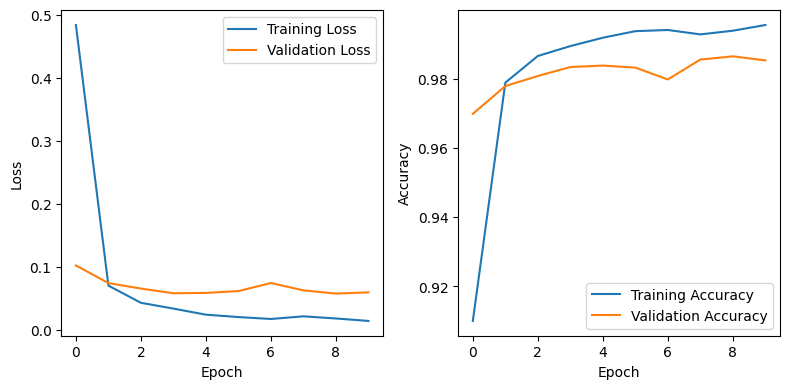

313/313 [==============================] - 2s 6ms/step - loss: 0.0566 - accuracy: 0.9852
Test Evaluation:
Loss: 0.056607432663440704
Accuracy: 0.9851999878883362


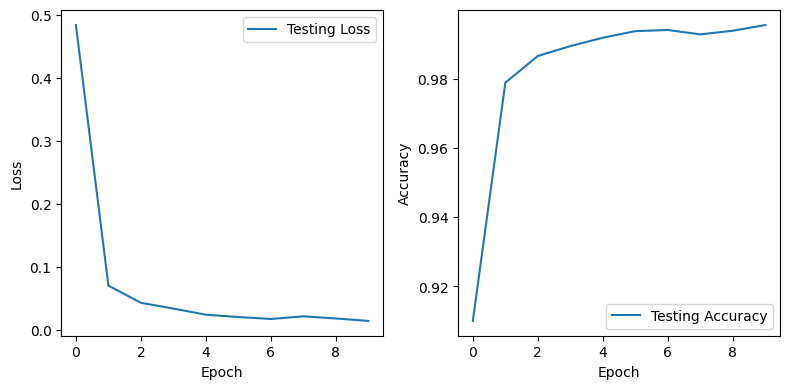

1/1 [==============================] - 0s 15ms/step


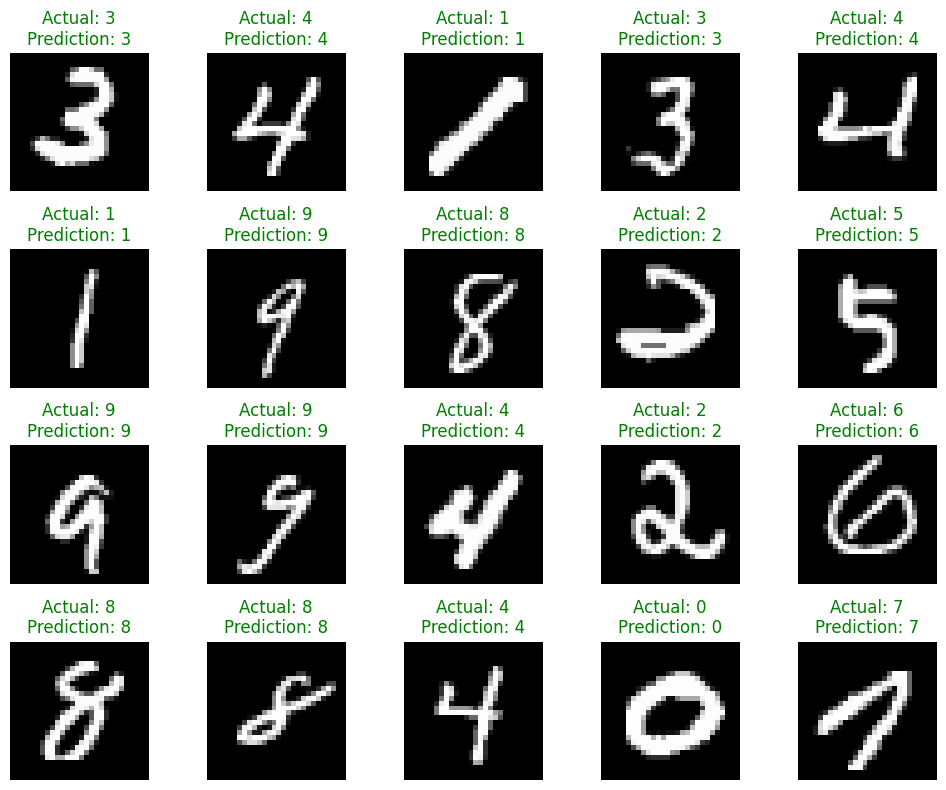

In [ ]:
# 0. Collect the raw data (it's the MNIST dataset)

# Importing the needed Machine Learning (ML) frameworks, libraries, APIs, packages, and modules (THIS IS NOT PART OF ANY STEP AT ALL!)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Load in the raw data as training/testing data

(x_sample_images_training, y_labels_training), (x_sample_images_testing, y_labels_testing) = keras.datasets.mnist.load_data()

# 2. Preprocess the "training data"

x_sample_images_training = x_sample_images_training.reshape((x_sample_images_training.shape[0], 28, 28, 1))
y_labels_training = to_categorical(y_labels_training, 10)

# Spliting the training dataset into 80% training data and 20% validation data subsets, respectively, with the "train_test_split" function from the "model_selection" module within the "scikit-learn" library
x_sample_images_training, x_validation, y_labels_training, y_validation = train_test_split(x_sample_images_training, y_labels_training, test_size=0.2, random_state=42)
# This is pretty much what we did before, except that this time, it's been simplified to fit onto one line.

# 3. Build and compile the neural network model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Training the model

history = model.fit(x_sample_images_training, y_labels_training, epochs=10, batch_size=128, verbose=1, validation_data=(x_validation, y_validation))

# 5. Plot the training and validation loss/accuracy results

plt.figure(figsize=(8, 4))

# Plotting the training and validation loss results
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy results
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Preprocess the "testing data"

x_sample_images_testing = x_sample_images_testing.reshape((x_sample_images_testing.shape[0], 28, 28, 1))
y_labels_testing = to_categorical(y_labels_testing, 10)

# 7. Test (or evaluate) the model

test_evaluation_loss, test_evaluation_accuracy = model.evaluate(x_sample_images_testing, y_labels_testing)
print(f"Test Evaluation:\nLoss: {test_evaluation_loss}\nAccuracy: {test_evaluation_accuracy}")

# 8. Plot the testing loss/accuracy results

plt.figure(figsize=(8, 4))

# Plotting the testing loss results
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the testing accuracy results
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 9. Have the model make further predictions on more unobserved image data

fig, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.ravel()

# Generating 20 color-coded predictions on 20 unobserved pieces of image data
for i in range(20):

    # Getting a random index value
    index = np.random.randint(0, len(x_sample_images_training))

    # Preprocessing a random sample image from the training dataset, based on the random index
    image = x_sample_images_training[index].reshape(28, 28)

    # Getting the "actual" label value from the randomly selected sample image, based on the random index
    actual = np.argmax(y_labels_training[index])

    # Having our model get the "predicted" label value from the randomly selected sample image, based on the random index
    prediction = np.argmax(model.predict(x_sample_images_training[index].reshape(1, *(28, 28, 1))))
    # The "np.argmax" function returns the index value of the maximum probability in an array of probabilities; that is, in this case, we'll end up getting such a "0 to 9" value,
    # which is a desired, "predicted" label value, depending on where the maximum probability occurs in the array.

    if(prediction == actual):
        color = 'green'
    else:
        color = 'red'

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Actual: {actual}\nPrediction: {prediction}", color=color)
    axes[i].axis('off')

# 10. Plot the model's "predicted" and "actual" label values

# Plotting the model's "predicted" and "actual" label values
plt.tight_layout()
plt.show()

## Machine Learning (ML) Workflow #5b: Testing the CNN Model and Further CNN Model Predictions on the MNIST Dataset without Training

313/313 [==============================] - 3s 7ms/step - loss: 24.8225 - accuracy: 0.0413
Test Evaluation:
Loss: 24.822511672973633
Accuracy: 0.04129999876022339


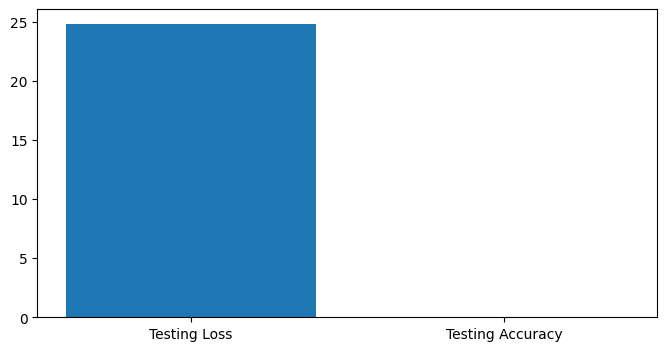

1/1 [==============================] - 0s 21ms/step


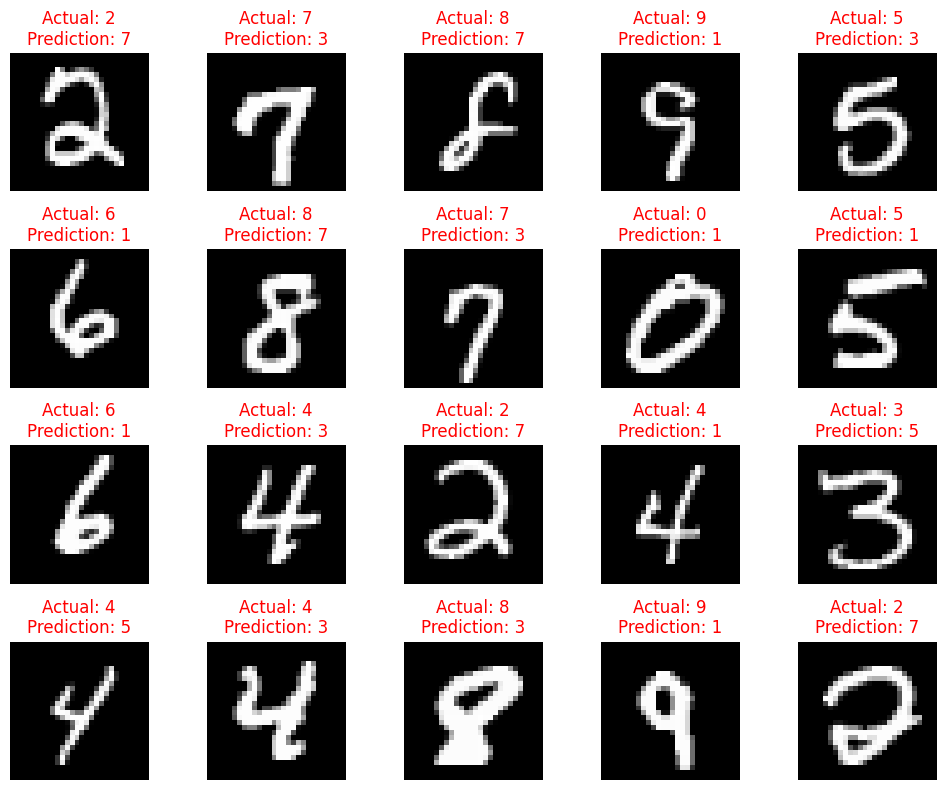

In [ ]:
# 0. Collect the raw data (it's the MNIST dataset)

# Importing the needed Machine Learning (ML) frameworks, libraries, APIs, packages, and modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Load in the raw data as training/testing data

(x_sample_images_training, y_labels_training), (x_sample_images_testing, y_labels_testing) = keras.datasets.mnist.load_data()

# 2. Preprocess the "training data"

x_sample_images_training = x_sample_images_training.reshape((x_sample_images_training.shape[0], 28, 28, 1))
y_labels_training = to_categorical(y_labels_training, 10)

x_sample_images_training, x_validation, y_labels_training, y_validation = train_test_split(x_sample_images_training, y_labels_training, test_size=0.2, random_state=42)

# 3. Build and compile the neural network model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

"""
# 4. Training the model

history = model.fit(x_sample_images_training, y_labels_training, epochs=10, batch_size=128, verbose=1, validation_data=(x_validation, y_validation))

# 5. Plot the training and validation losses/accuracy results

plt.figure(figsize=(8, 4))

# Plotting the training and validation loss results
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy results
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
"""

# 6. Preprocess the "testing data"

x_sample_images_testing = x_sample_images_testing.reshape((x_sample_images_testing.shape[0], 28, 28, 1))
y_labels_testing = to_categorical(y_labels_testing, 10)

# 7. Test (or evaluate) the model

test_evaluation_loss, test_evaluation_accuracy = model.evaluate(x_sample_images_testing, y_labels_testing)
print(f"Test Evaluation:\nLoss: {test_evaluation_loss}\nAccuracy: {test_evaluation_accuracy}")

# 8. Plot the testing loss and accuracy results

plt.figure(figsize=(8, 4))

# Plotting the testing loss and accuracy results on a bar graph
plt.bar(['Testing Loss', 'Testing Accuracy'], [test_evaluation_loss, test_evaluation_accuracy])
# It was noticed here that the testing loss/accuracy line plots didn't match nicely with the testing loss/accuracy results, at all. In order to fix this problem,
# a bar plot was used, in place of the line plot.

plt.show()

# 9. Have the model make further predictions on more unobserved image data

fig, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.ravel()

for i in range(20):
    index = np.random.randint(0, len(x_sample_images_training))
    image = x_sample_images_training[index].reshape(28, 28)
    actual = np.argmax(y_labels_training[index])
    prediction = np.argmax(model.predict(x_sample_images_training[index].reshape(1, *(28, 28, 1))))

    if(prediction == actual):
        color = 'green'
    else:
        color = 'red'

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Actual: {actual}\nPrediction: {prediction}", color=color)
    axes[i].axis('off')

# 10. Plot the model's "predicted" and "actual" label values

plt.tight_layout()
plt.show()

Given that the CNN model hadn't undergone the needed training, it obviously tests horribly on the data here!